In [36]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib 
import itertools
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.pipeline import Pipeline
from scipy import interp

print(sklearn.__version__)

0.19.1


In [37]:
# data = pd.read_pickle("mql_data/mql_dataset.gzip",compression="gzip") 
data = pd.read_pickle("mql_data/mql_dataset.gzip",compression="gzip") 

In [109]:
def features_engineering(df):
    result = pd.DataFrame()
    # Features
    # age
    result["age_18_24"] = ((df["age"] >= 18) & (df["age"] < 24))
    result["age_24_30"] = ((df["age"] >= 24) & (df["age"] < 30))
    result["age_30_40"] = ((df["age"] >= 30) & (df["age"] < 40))
    result["age_40_50"] = ((df["age"] >= 40) & (df["age"] < 50))
    result["age_50_80"] = ((df["age"] >= 50) & (df["age"] <= 80))
    result["age_trash"] = ((df["age"] < 18) | (df["age"] > 80))
    
#     age_def = 30.0
#     result['age'] = df['age']
#     result['age'][(result['age'].isnull() | (result["age"] < 18) | (result["age"] > 90))] = age_def
    # locle

#     result["locale_en_US"] = df["locale"] == "en_US"
#     result["locale_pt_PT"] = df["locale"] == "pt_PT"
#     result["locale_id_ID"] = df["locale"] == "id_ID"
#     result["locale_es_ES"] = df["locale"] == "es_ES"
#     result["locale_de_DE"] = df["locale"] == "de_DE"
#     result["locale_ru_RU"] = df["locale"] == "ru_RU"
#     result["locale_fr_FR"] = df["locale"] == "fr_FR"
#     result["locale_it_IT"] = df["locale"] == "it_IT"
#     result["locale_th_TH"] = df["locale"] == "th_TH"
#     result["locale_ko_KO"] = df["locale"] == "ko_KO"
#     result["locale_zh_CN"] = df["locale"] == "zh_CN"
#     result["locale_tr_TR"] = df["locale"] == "tr_TR"
#     result["locale_ar_KW"] = df["locale"] == "ar_KW"
#     result["locale_sv_SE"] = df["locale"] == "sv_SE"
#     result["locale_no_NO"] = df["locale"] == "no_NO"

    # country
#     result['country_id_225'] = df['country_id'] == 225
#     result['country_id_94'] = df['country_id'] == 94
#     result['country_id_30'] = df['country_id'] == 30
#     result['country_id_194'] = df['country_id'] == 194
#     result['country_id_151'] = df['country_id'] == 151
#     result['country_id_119'] = df['country_id'] == 119
#     result['country_id_162'] = df['country_id'] == 162
#     result['country_id_128'] = df['country_id'] == 128
#     result['country_id_78'] = df['country_id'] == 78
#     result['country_id_206'] = df['country_id'] == 206
#     result['country_id_200'] = df['country_id'] == 200
#     result['country_id_180'] = df['country_id'] == 180
#     result['country_id_205'] = df['country_id'] == 205
#     result['country_id_157'] = df['country_id'] == 157
#     result['country_id_97'] = df['country_id'] == 97
#     result['country_id_72'] = df['country_id'] == 72
#     result['country_id_181'] = df['country_id'] == 181
#     result['country_id_175'] = df['country_id'] == 175
#     result['country_id_164'] = df['country_id'] == 164
#     result['country_id_212'] = df['country_id'] == 212
#     result['country_id_91'] = df['country_id'] == 91
#     result['country_id_182'] = df['country_id'] == 182
#     result['country_id_140'] = df['country_id'] == 140
#     result['country_id_46'] = df['country_id'] == 46
#     result['country_id_204'] = df['country_id'] == 204
#     result['country_id_18'] = df['country_id'] == 18
#     result['country_id_134'] = df['country_id'] == 134
#     result['country_id_183'] = df['country_id'] == 183
#     result['country_id_146'] = df['country_id'] == 146
#     result['country_id_191'] = df['country_id'] == 191
#     result['country_id_189'] = df['country_id'] == 189
#     result['country_id_171'] = df['country_id'] == 171
#     result['country_id_10'] = df['country_id'] == 10
#     result['country_id_62'] = df['country_id'] == 62
#     result['country_id_220'] = df['country_id'] == 220
#     result['country_id_2'] = df['country_id'] == 2
#     result['country_id_211'] = df['country_id'] == 211
#     result['country_id_14'] = df['country_id'] == 14
#     result['country_id_159'] = df['country_id'] == 159
#     result['country_id_156'] = df['country_id'] == 156
#     result['country_id_101'] = df['country_id'] == 101
#     result['country_id_160'] = df['country_id'] == 160
#     result['country_id_108'] = df['country_id'] == 108
#     result['country_id_3'] = df['country_id'] == 3
#     result['country_id_55'] = df['country_id'] == 55
#     result['country_id_0'] = df['country_id'] == 0
#     result['country_id_95'] = df['country_id'] == 95
#     result['country_id_42'] = df['country_id'] == 42
#     result['country_id_61'] = df['country_id'] == 61
#     result['country_id_59'] = df['country_id'] == 59
#     result['country_id_188'] = df['country_id'] == 188
#     result['country_id_77'] = df['country_id'] == 77
#     result['country_id_113'] = df['country_id'] == 113
#     result['country_id_92'] = df['country_id'] == 92
#     result['country_id_79'] = df['country_id'] == 79
#     result['country_id_102'] = df['country_id'] == 102
#     result['country_id_100'] = df['country_id'] == 100
#     result['country_id_143'] = df['country_id'] == 143
#     result['country_id_32'] = df['country_id'] == 32
#     result['country_id_130'] = df['country_id'] == 130
#     result['country_id_139'] = df['country_id'] == 139
#     result['country_id_104'] = df['country_id'] == 104
#     result['country_id_15'] = df['country_id'] == 15
#     result['country_id_81'] = df['country_id'] == 81
#     result['country_id_20'] = df['country_id'] == 20
#     result['country_id_176'] = df['country_id'] == 176

    # gender
#     result["fill_gender"] = (data['gender'].isnull() == False)
    result["gender_1"] = df["gender"] == 1
    result["gender_2"] = df["gender"] == 2

    # currency_id
    result['currency_id_5'] = df['currency_id'] == 5
    result['currency_id_1'] = df['currency_id'] == 1
    result['currency_id_2'] = df['currency_id'] == 2
    result['currency_id_6'] = df['currency_id'] == 6
    result['currency_id_7'] = df['currency_id'] == 7
    result['currency_id_4'] = df['currency_id'] == 4
    result['currency_id_8'] = df['currency_id'] == 8
   

    # client_platform_id
    result['client_platform_id_2'] = df['client_platform_id'] == 2
    result['client_platform_id_9'] = df['client_platform_id'] == 9
    result['client_platform_id_3'] = df['client_platform_id'] == 3
    result['client_platform_id_12'] = df['client_platform_id'] == 12
    
    result['used_historical_prices'] = df['used_historical_prices']
    result['tried_to_change_asset'] = df['tried_to_change_asset']
    result['changed_deal_amount_manualy'] = df['changed_deal_amount_manualy']
    result['visit_traderoom'] = df['visit_traderoom']
    result['button_deposit_pag'] = df['button_deposit_pag']
    result['visited_withdrawal_page'] = df['visited_withdrawal_page']
    result['added_technical_analysis'] = df['added_technical_analysis']
    result['changed_chart_type'] = df['changed_chart_type']
    result['open_video_tutorial'] = df['open_video_tutorial']
    result['sell_option_used'] = df['sell_option_used']
    result['refreshed_demo'] = df['refreshed_demo']
    result['phone_confirmed'] = df['phone_confirmed']
    result['user_use_buyback'] = df['user_use_buyback']
    result['trading_indicator_added'] = df['trading_indicator_added']
        
    
    result['volume_train_digital'] = df['volume_train_digital']
    result['pnl_train_digital'] = df['pnl_train_digital']
    result['volume_train_cfd'] = df['volume_train_cfd']
    result['pnl_train_cfd'] = df['pnl_train_cfd']
    result['volume_train_forex'] = df['volume_train_forex']
    result['pnl_train_forex'] = df['pnl_train_forex']
    result['volume_train_crypto'] = df['volume_train_crypto']
    result['pnl_train_crypto'] = df['pnl_train_crypto']
    result['closed_count'] = df['closed_count']
    result['instrument_actives_count'] = df['instrument_actives_count']
    result['instrument_actives_digital_count'] = df['instrument_actives_digital_count']
    result['instrument_actives_cfd_count'] = df['instrument_actives_cfd_count']
    result['instrument_actives_forex_count'] = df['instrument_actives_forex_count']
    result['instrument_actives_crypto_count'] = df['instrument_actives_crypto_count']
    result['digital_count'] = df['digital_count']
    result['cfd_count'] = df['cfd_count']
    result['forex_count'] = df['forex_count']
    result['crypto_count'] = df['crypto_count']
    result['bin_count'] = df['bin_count']
    result['volume_train_bin'] = df['volume_train_bin']
    result['pnl_train_bin'] = df['pnl_train_bin']
    result['instrument_actives_bin_count'] = df['instrument_actives_bin_count']
    
    
#     result['n_volume_train_digital'] = df['n_volume_train_digital']
#     result['n_pnl_train_digital'] = df['n_pnl_train_digital']
#     result['n_volume_train_cfd'] = df['n_volume_train_cfd']
#     result['n_pnl_train_cfd'] = df['n_pnl_train_cfd']
#     result['n_volume_train_forex'] = df['n_volume_train_forex']
#     result['n_pnl_train_forex'] = df['n_pnl_train_forex']
#     result['n_volume_train_crypto'] = df['n_volume_train_crypto']
#     result['n_pnl_train_crypto'] = df['n_pnl_train_crypto']
#     result['n_deal_count'] = df['n_deal_count']
#     result['n_closed_count'] = df['n_closed_count']
#     result['n_instrument_actives_count'] = df['n_instrument_actives_count']
#     result['n_instrument_actives_digital_count'] = df['n_instrument_actives_digital_count']
#     result['n_instrument_actives_cfd_count'] = df['n_instrument_actives_cfd_count']
#     result['n_instrument_actives_forex_count'] = df['n_instrument_actives_forex_count']
#     result['n_instrument_actives_crypto_count'] = df['n_instrument_actives_crypto_count']
#     result['n_digital_count'] = df['n_digital_count']
#     result['n_cfd_count'] = df['n_cfd_count']
#     result['n_forex_count'] = df['n_forex_count']
#     result['n_crypto_count'] = df['n_crypto_count']
    
#     result['b_deals'] = df['b_deals']
#     result['b_train_count'] = df['b_train_count']
#     result['b_actives_train_count'] = df['b_actives_train_count']
#     result['b_volume_train'] = df['b_volume_train']
#     result['b_pnl_train'] = df['b_pnl_train']
    
    result = result.fillna(0)
    return result


# data = features_engineering
# data['deposits'].value_counts(dropna=False)

In [71]:
sample_size = 100000
sample_data = data.sample(sample_size)

def to_clf_data(df):
    X_df = (features_engineering(df))
    X = X_df.as_matrix()
    y =(df['deposits'] > 0).as_matrix()
    return X,y

X_s,y_s = to_clf_data(sample_data)


In [56]:
# sample_data['client_platform_id'].value_counts()
# sample_data[['user_id','deposits']]

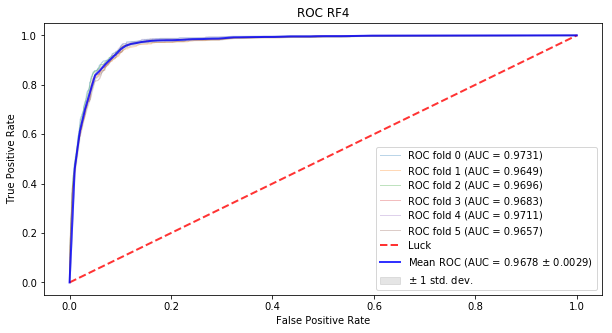

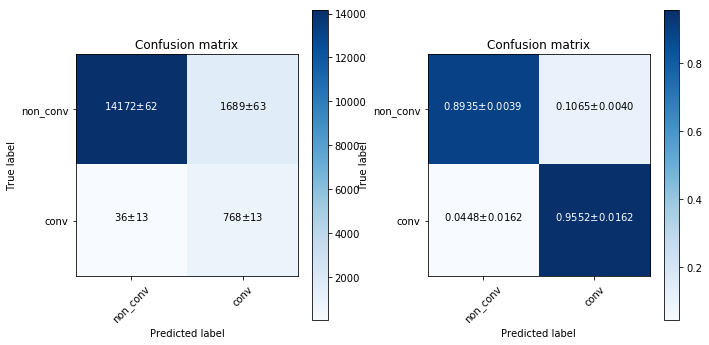

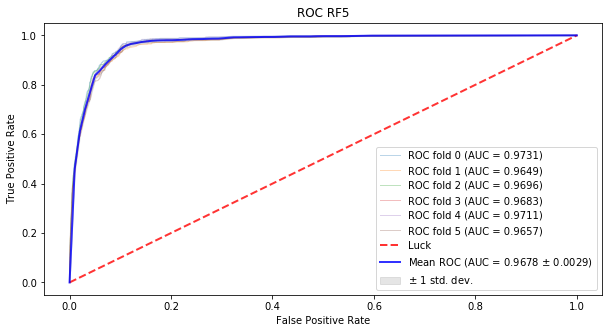

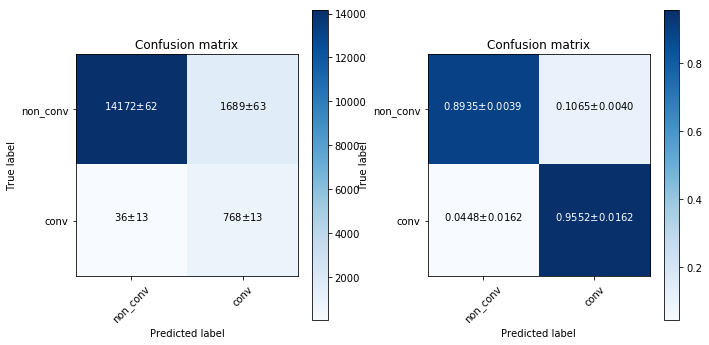

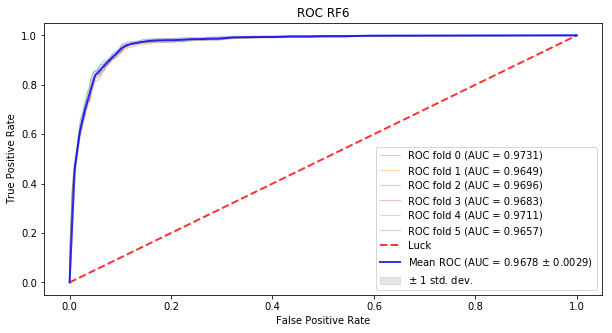

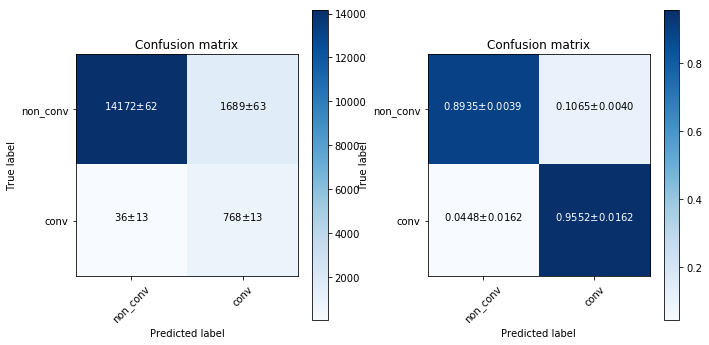

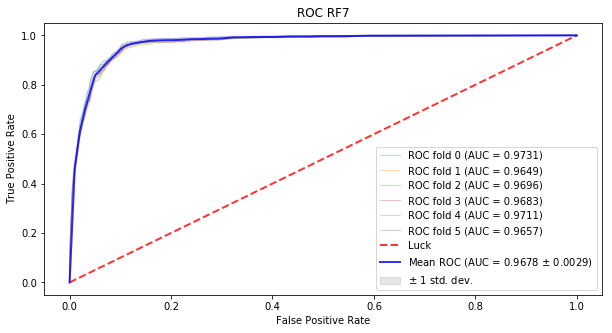

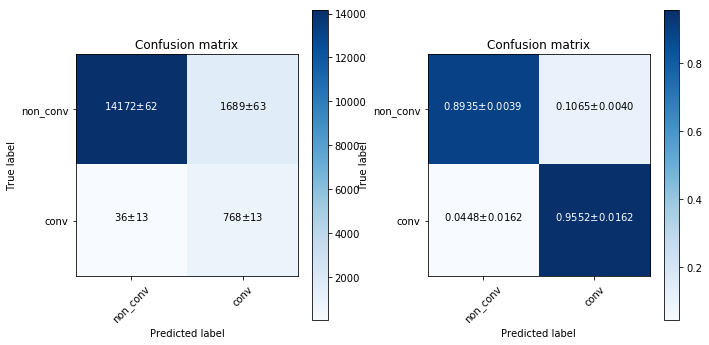

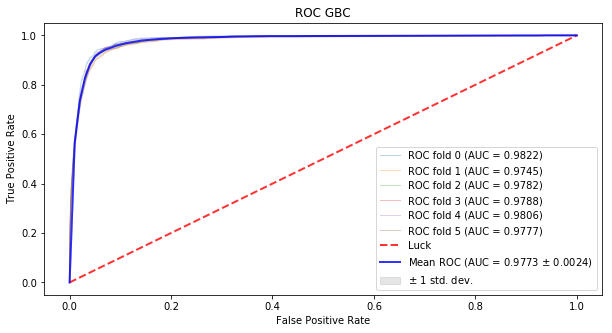

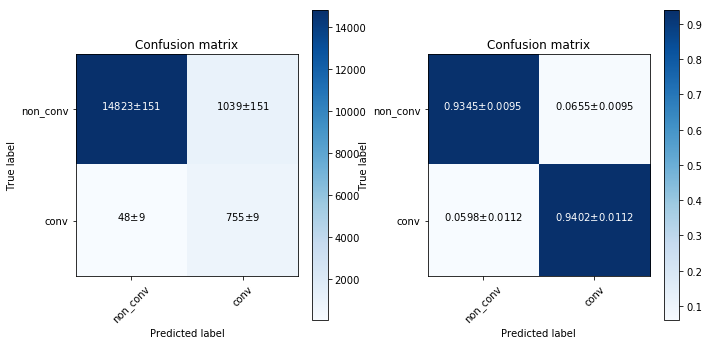

/Users/aleksey.pshenichnyy/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


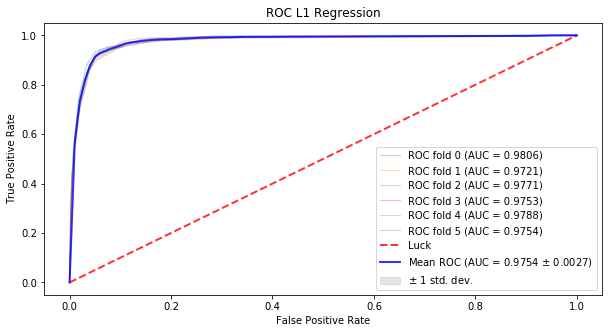

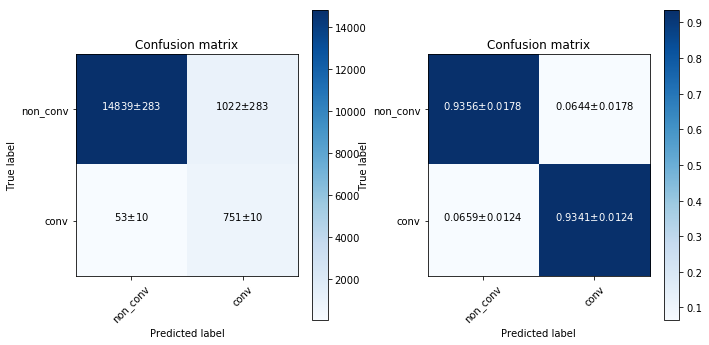

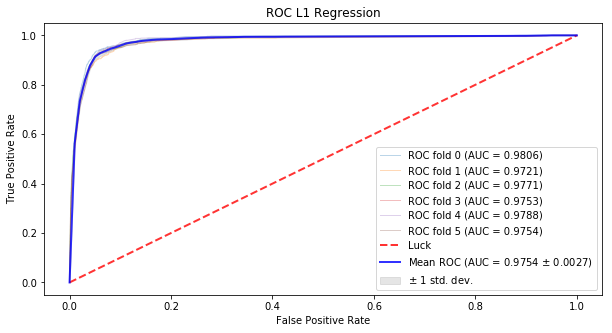

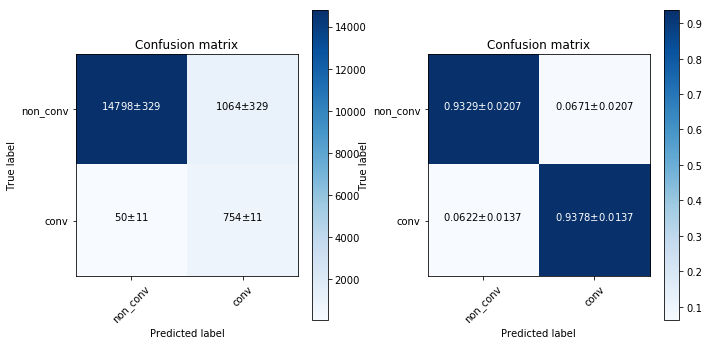

('RF4', (0.96777568074241338, 0.0028833466855091383))
('RF5', (0.96777568074241338, 0.0028833466855091383))
('RF6', (0.96777568074241338, 0.0028833466855091383))
('RF7', (0.96777568074241338, 0.0028833466855091383))
('GBC', (0.97733187895343199, 0.0024010102015553448))
('L1 LR', (0.9753962670959464, 0.0027272060943304729))


In [110]:
def cutoff_youdens_j(fpr,tpr,thresholds):
    j_scores = tpr-fpr
    j_ordered = sorted(zip(j_scores,thresholds))
    return j_ordered[-1][1]

def plot_confusion_matrix(cm, classes,
                          dcm=None,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    def plot(cm,dcm,normalize):            
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = '.4f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if dcm is not None:
                text = format(cm[i, j], fmt) + r'$\pm$' + format(dcm[i, j], fmt) 
            else:
                text = format(cm[i, j], fmt)
            plt.text(j, i, text,
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
    
    ncm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    if dcm is not None:
        ndcm = dcm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        ndcm = None
    plt.subplot(1, 2, 1)
    plot(cm,dcm,False)
    plt.subplot(1, 2, 2)
    plot(ncm,ndcm,True)
    
def test_classifier(clf,X,y,title,cv_samples=6,verbose=False):
    cv = StratifiedKFold(n_splits=cv_samples)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    thres = []
    cnf_matrixs = []
    
    plt.subplot()
    for i,(train, test) in enumerate(cv.split(X, y)):
        if verbose:
            print(f"Number of cv split: {i}")
        probas_ = clf.fit(X[train], y[train]).predict_proba(X[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        if cv_samples > 6:
            plt.plot(fpr, tpr, lw=1, alpha=0.3)
        else:
            plt.plot(fpr, tpr, lw=1, alpha=0.3,
                     label='ROC fold %d (AUC = %0.4f)' % (i, roc_auc))
        main_threshold = cutoff_youdens_j(fpr,tpr,thresholds)
        cnf_matrix = confusion_matrix(y[test], probas_[:, 1] > main_threshold)
        thres.append(main_threshold)
        cnf_matrixs.append(cnf_matrix)
    
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.4f $\pm$ %0.4f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC '+title)
    plt.legend(loc="lower right")
    cnf_ax2 = np.stack(cnf_matrixs, axis=2)
    cnf = cnf_ax2.mean(axis=2).astype(int)
    dcnf = ((cnf_ax2.max(axis=2) - cnf_ax2.min(axis=2)) / 2).astype(int)
    class_names = ["non_conv","conv"]
    plt.show()
    plot_confusion_matrix(cm=cnf,classes=class_names,dcm=dcnf)
    plt.show()
    return (mean_auc, std_auc)
    


plt.rcParams["figure.figsize"] = (10,5)

result = []
rf_clf = RandomForestClassifier(max_depth=3,
                             n_jobs=4,
                             n_estimators=100, 
                             random_state=1,
#                              verbose = 1,
                             class_weight = "balanced_subsample")

result.append(("RF4",test_classifier(rf_clf,X_s,y_s,"RF4")))

rf_clf = RandomForestClassifier(max_depth=3,
                             n_jobs=5,
                             n_estimators=100, 
                             random_state=1,
#                              verbose = 1,
                             class_weight = "balanced_subsample")

result.append(("RF5",test_classifier(rf_clf,X_s,y_s,"RF5")))

rf_clf = RandomForestClassifier(max_depth=3,
                             n_jobs=6,
                             n_estimators=100, 
                             random_state=1,
#                              verbose = 1,
                             class_weight = "balanced_subsample")


result.append(("RF6",test_classifier(rf_clf,X_s,y_s,"RF6")))

rf_clf = RandomForestClassifier(max_depth=3,
                             n_jobs=7,
                             n_estimators=100, 
                             random_state=1,
#                              verbose = 1,
                             class_weight = "balanced_subsample")

result.append(("RF7",test_classifier(rf_clf,X_s,y_s,"RF7")))


gb_clf = grd = GradientBoostingClassifier(max_depth=6,
                             n_estimators=100, 
                             random_state=1)


result.append(("GBC",test_classifier(gb_clf,X_s,y_s,"GBC")))

scaler = StandardScaler().fit(X_s)
X_scale_s = scaler.transform(X_s)

logistic_clf = LogisticRegression(C=0.01, penalty='l1', tol=0.01)
test_classifier(logistic_clf,X_scale_s,y_s,"L1 Regression")
result.append(("L1 LR",test_classifier(logistic_clf,X_scale_s,y_s,"L1 Regression")))

for r in result:
    print(r)




In [52]:
def make_country_data(df,country_ids):
    df_filter = None 
    for country_id in country_ids:
        if df_filter is not None:
            df_filter |= (df['country_id'] == country_id)
        else:
            df_filter = (df['country_id'] == country_id)
    return df[df_filter]
  
africa_ids = [180,134,146,62,79,102,104,199,193,51,3]
arab_ids = [162,205,171,108,95,100]
asia_ids = [94,194,119,151,157,181,175,91,212,191,18,183,101,77,143,15,139,43,208,35]
india_ids = [225]
europe_ids = [78,206,72,97,164,140,182,204,189,2,220,14,160,159,55,188,113,92,32,130,81,176,56,27,52,177,20,116,96,149,107,71]
latam_ids = [30,128,46,10,211,156,42,61,59,26,50,86]

africa = make_country_data(data,africa_ids)
arab = make_country_data(data,arab_ids)
asia = make_country_data(data,asia_ids)
india = make_country_data(data,india_ids)
europe = make_country_data(data,europe_ids)
latam = make_country_data(data,latam_ids)



# arabs = data[(data['country_id'] == 104) 
#          | (data['country_id'] == 108) 
#          | (data['country_id'] == 151)
#         | (data['country_id'] == 162)
#         | (data['country_id'] == 171)
#         | (data['country_id'] == 205)]

# india = data[(data['country_id'] == 225)] 

# arabs_X_df = (features_engineering(arabs))
# arabs_X = arabs_X_df.as_matrix()
# arabs_y = (arabs['deposits'] > 0).as_matrix()


# india_X_df = (features_engineering(india))
# india_X = india_X_df.as_matrix()
# india_y = (india['deposits'] > 0).as_matrix()
# ((arabs['deposits'] > 0).sum(),(india['deposits'] > 0).sum())

/Users/aleksey.pshenichnyy/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


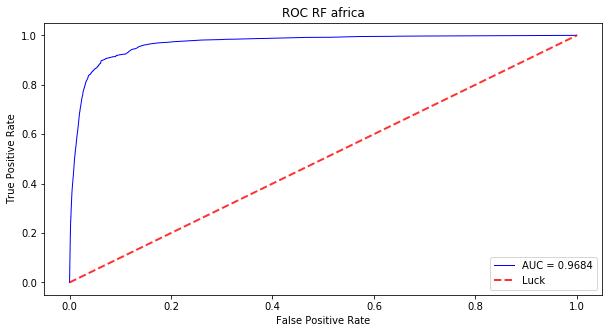

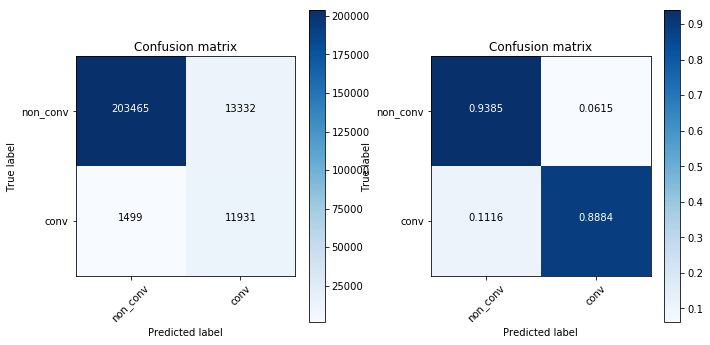

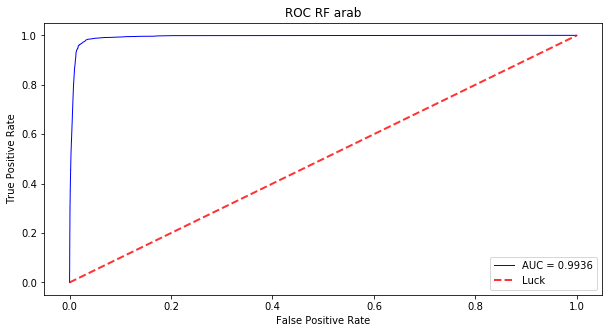

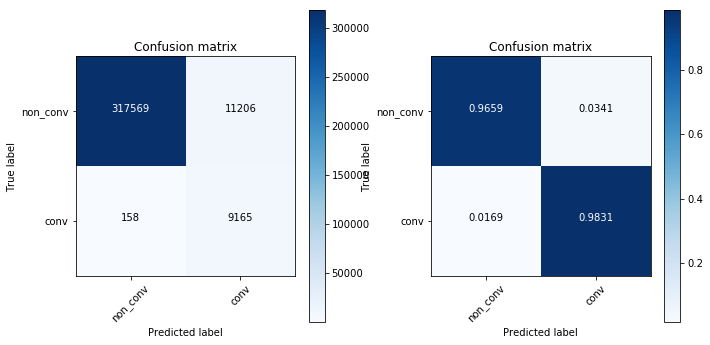

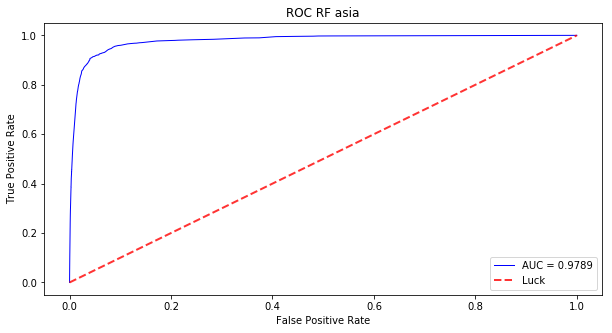

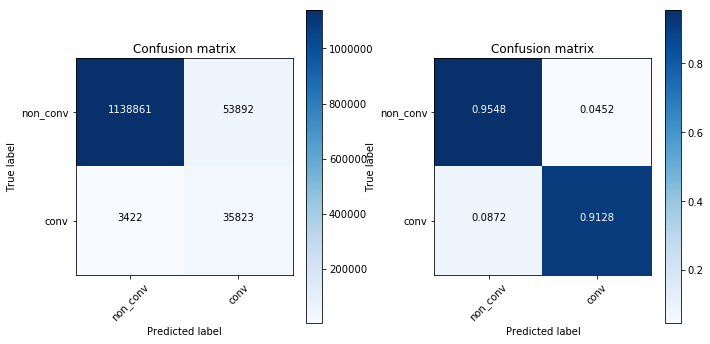

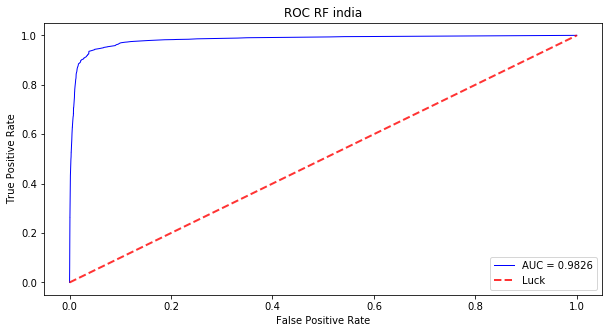

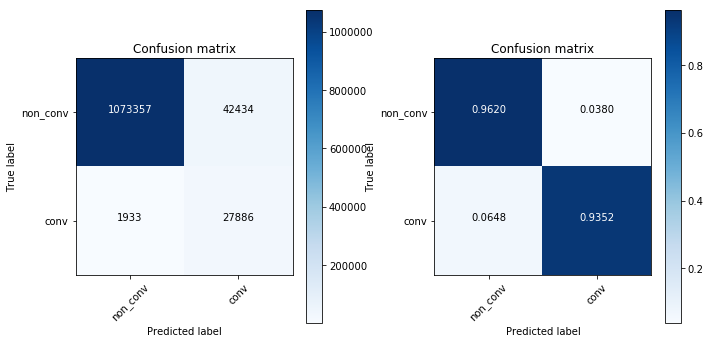

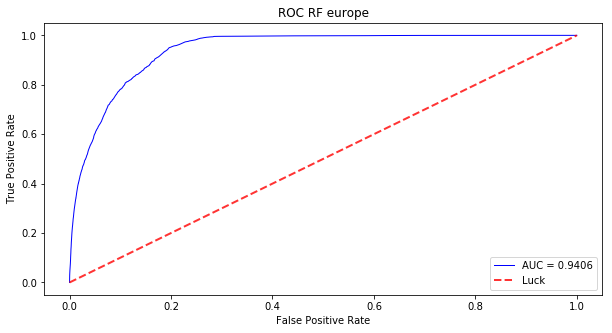

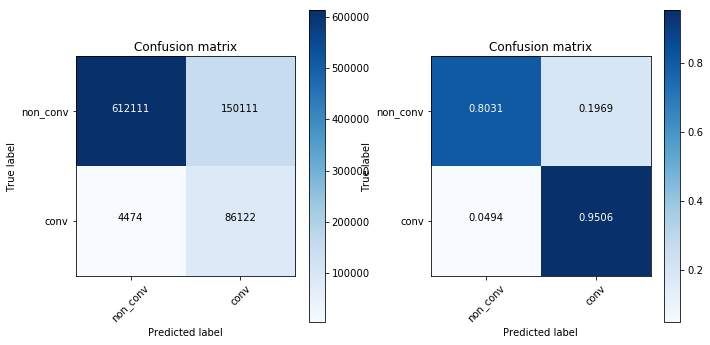

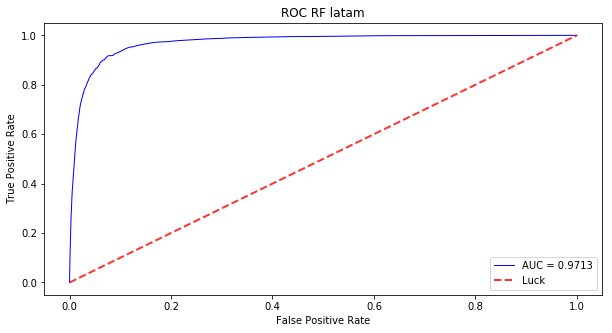

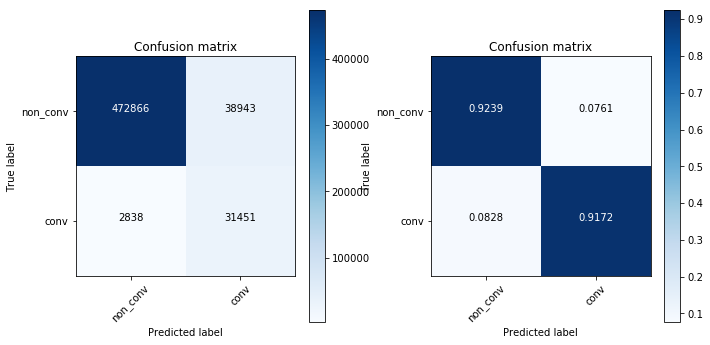

In [53]:
def test_clf_on_data(clf,title,X_train,y_train,X_test,y_test):
        probas_ = clf.fit(X_train, y_train).predict_proba(X_test)
#         probas_ = clf.predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
        roc_auc = auc(fpr, tpr)
        main_threshold = cutoff_youdens_j(fpr,tpr,thresholds)
        cnf_matrix = confusion_matrix(y_test, probas_[:, 1] > main_threshold)
                    
        plt.plot(fpr, tpr, lw=1, color='b',
                 label=r'AUC = %0.4f' % roc_auc)
        plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
        plt.xlim([-0.05, 1.05])
        plt.ylim([-0.05, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC '+title)
        plt.legend(loc="lower right")
        class_names = ["non_conv","conv"]
        plt.show()
        plot_confusion_matrix(cm=cnf_matrix,classes=class_names)
        plt.show()

india_X_scale = scaler.transform(india_X)
arabs_X_scale = scaler.transform(arabs_X)
logistic_clf = LogisticRegression(C=0.01, penalty='l1', tol=0.01)
rf_clf = RandomForestClassifier(max_depth=4,
                             n_jobs=4,
                             n_estimators=100, 
                             random_state=1)


X_africa,y_africa = to_clf_data(africa)
# test_clf_on_data(logistic_clf,"LR africa",X_s,y_s,X_africa,y_africa)
test_clf_on_data(rf_clf,"RF africa",X_s,y_s,X_africa,y_africa)

X_arab,y_arab = to_clf_data(arab)
# test_clf_on_data(logistic_clf,"LR arab",X_s,y_s,X_arab,y_arab)
test_clf_on_data(rf_clf,"RF arab",X_s,y_s,X_arab,y_arab)

X_asia,y_asia = to_clf_data(asia)
# test_clf_on_data(logistic_clf,"LR asia",X_s,y_s,X_asia,y_asia)
test_clf_on_data(rf_clf,"RF asia",X_s,y_s,X_asia,y_asia)

X_india,y_india = to_clf_data(india)
# test_clf_on_data(logistic_clf,"LR india",X_s,y_s,X_india,y_india)
test_clf_on_data(rf_clf,"RF india",X_s,y_s,X_india,y_india)

X_europe,y_europe = to_clf_data(europe)
# test_clf_on_data(logistic_clf,"LR europe",X_s,y_s,X_europe,y_europe)
test_clf_on_data(rf_clf,"RF europe",X_s,y_s,X_europe,y_europe)

X_latam,y_latam = to_clf_data(latam)
# test_clf_on_data(logistic_clf,"LR latam",X_s,y_s,X_latam,y_latam)
test_clf_on_data(rf_clf,"RF latam",X_s,y_s,X_latam,y_latam)







In [ ]:
X_tt =  
def to_clf_data(df):
    X_df = (features_engineering(df))
    X = X_df.as_matrix()
    y =(df['deposits'] > 0).as_matrix()
    return X,y
rf_clf.predict_proba(X_test)

In [ ]:
imp_f = sorted(list(zip(X_df.columns.values, rf_clf.feature_importances_)),key = lambda x: -x[1])
imp_f

In [ ]:
# print(logistic_clf.coef_[0])
sorted(list(zip(X_df.columns.values, logistic_clf.coef_[0])),key = lambda x: -x[1])

In [ ]:
data.groupby('client_platform_id')['has_deposit'].mean()
id,name,name_key
5,Web mobile,web_mobile
7,MacGL,mac_gl
1,Web Old,web_old
2,Android,android
3,Ios,ios
4,Web New,web_new
8,WinGL,win_gl
9,WebGL,web_gl
10,IQ Robot's 1.0,iq_robots
6,Web 3.0,web_3
11,LinuxGL,linux_gl
1000,Auto test robot,auto_test
12,Ios CFD,ios_cfd
13,Hodly Wallet iOS,hodly_wallet_ios
14,Hodly Wallet Android,hodly_wallet_android
15,IQ Option Wallet Web,otn_wallet_web
16,Hodly Wallet Web,hodly_wallet_web


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    3.9s finished


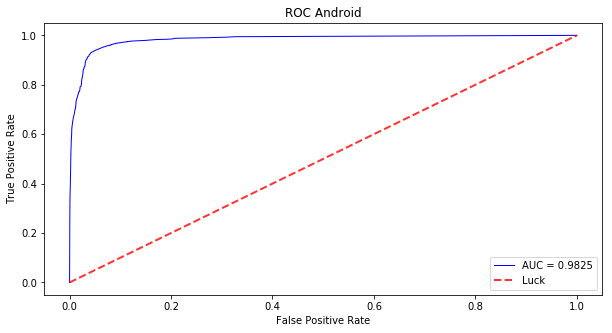

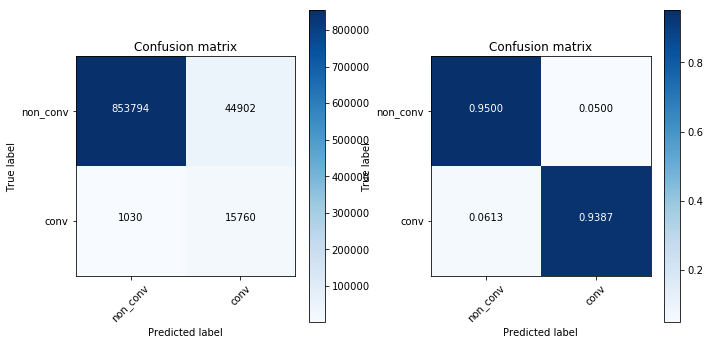

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.3s finished


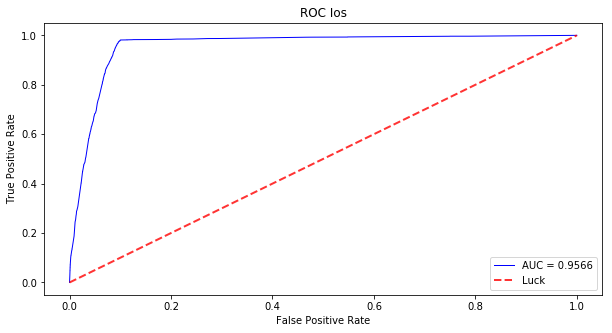

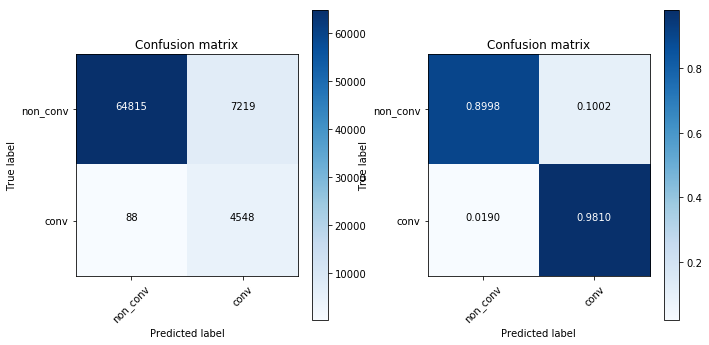

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.1s finished


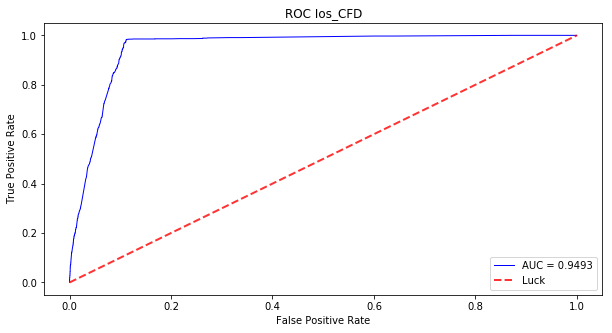

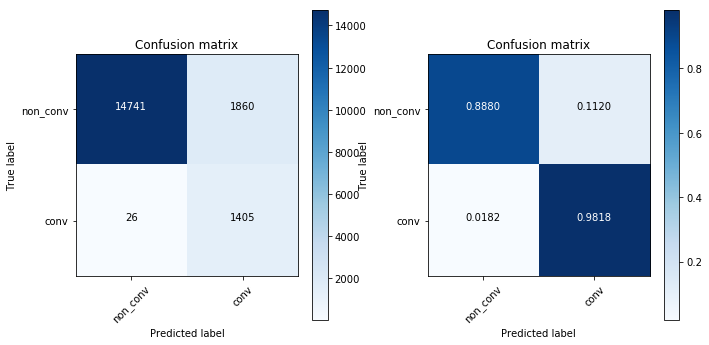

In [35]:
def make_country_data(df,country_ids):
    df_filter = None 
    for country_id in country_ids:
        if df_filter is not None:
            df_filter |= (df['country_id'] == country_id)
        else:
            df_filter = (df['country_id'] == country_id)
    return df[df_filter]
  
africa_ids = [180,134,146,62,79,102,104,199,193,51,3]
arab_ids = [162,205,171,108,95,100]
asia_ids = [94,194,119,151,157,181,175,91,212,191,18,183,101,77,143,15,139,43,208,35]
india_ids = [225]
europe_ids = [78,206,72,97,164,140,182,204,189,2,220,14,160,159,55,188,113,92,32,130,81,176,56,27,52,177,20,116,96,149,107,71]
latam_ids = [30,128,46,10,211,156,42,61,59,26,50,86]

# africa = make_country_data(data,africa_ids)
# arab = make_country_data(data,arab_ids)
asia = make_country_data(data,asia_ids)
# india = make_country_data(data,india_ids)
# europe = make_country_data(data,europe_ids)
# latam = make_country_data(data,latam_ids)



cf2_data = asia[(asia['client_platform_id'] == 2)]
cf3_data = asia[(asia['client_platform_id'] == 3)]
# cf9_data = data[(data['client_platform_id'] == 9)]
cf12_data = asia[(asia['client_platform_id'] == 12)]
# cf14_data = data[(data['client_platform_id'] == 14)]

# def test_data(some_data,title):
#     rf_clf = RandomForestClassifier(max_depth=3,
#                                  n_jobs=4,
#                                  n_estimators=100, 
#                                  random_state=1)
#     logistic_clf = LogisticRegression(C=0.01, penalty='l1', tol=0.01)
#     some_data_df = (features_engineering(some_data))
#     some_data_X = some_data_df.as_matrix()
#     some_data_y = (some_data['deposits'] > 0).as_matrix()
#     some_data_X_scale = scaler.transform(some_data_X)
#     test_clf_on_data(rf_clf,"RF "+title,X_s,y_s,some_data_X,some_data_y)
#     test_clf_on_data(logistic_clf,"LR "+title,X_s,y_s,some_data_X_scale,some_data_y)
    
# test_data(cf2_data,"client_pl_Android")
# test_data(cf3_data,"client_pl_Ios")
# test_data(cf9_data,"client_pl_WebGL")
# test_data(cf12_data,"cflient_pl_Ios_CFD")
# test_data(cf14_data,"cflient_pl_Web New")

def cutoff_youdens_j(fpr,tpr,thresholds):
    j_scores = tpr-fpr
    j_ordered = sorted(zip(j_scores,thresholds))
    return j_ordered[-1][1]

def to_clf_data(df):
    X_df = (features_engineering(df))
    X = X_df.as_matrix()
    y =(df['deposits'] > 0).as_matrix()
    return X,y

X_cf2,y_cf2 = to_clf_data(cf2_data)
X_cf3,y_cf3 = to_clf_data(cf3_data)
X_cf12,y_cf12 = to_clf_data(cf12_data)


plt.rcParams["figure.figsize"] = (10,5)
# rf_clf = RandomForestClassifier(max_depth=3,
#                              n_jobs=4,
#                              n_estimators=100, 
#                              random_state=1,
# #                              verbose = 1,
#                              class_weight = "balanced_subsample")
def test_clf_on_data(clf,X_test,y_test,title):
        probas_ = clf.predict_proba(X_test)
#         probas_ = clf.predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
        roc_auc = auc(fpr, tpr)
        main_threshold = cutoff_youdens_j(fpr,tpr,thresholds)
        cnf_matrix = confusion_matrix(y_test, probas_[:, 1] > main_threshold)
                    
        plt.plot(fpr, tpr, lw=1, color='b',
                 label=r'AUC = %0.4f' % roc_auc)
        plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
        plt.xlim([-0.05, 1.05])
        plt.ylim([-0.05, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC '+title)
        plt.legend(loc="lower right")
        class_names = ["non_conv","conv"]
        plt.show()
        plot_confusion_matrix(cm=cnf_matrix,classes=class_names)
        plt.show()
        
test_clf_on_data(clf,X_cf2,y_cf2,"Android")
test_clf_on_data(clf,X_cf3,y_cf3,"Ios")
test_clf_on_data(clf,X_cf12,y_cf12,"Ios_CFD")


In [26]:
def make_by_field_data(df,field,fields_ids):
    df_filter = None 
    for field_id in fields_ids:
        if df_filter is not None:
            df_filter |= (df[field] == field_id)
        else:
            df_filter = (df[field] == field_id)
    return df[df_filter]

user_data = make_by_field_data(data,'user_id',[27497585, 28462065, 27991736, 28868273])
user_data
user_data_X,user_data_y = to_clf_data(user_data)
rf_clf.predict_proba(user_data_X),user_data_y


(array([[ 0.82596257,  0.17403743],
        [ 0.97866216,  0.02133784],
        [ 0.45223615,  0.54776385],
        [ 0.99042858,  0.00957142]]),
 array([ True, False,  True, False], dtype=bool))

In [49]:
# data['created'].query('2017-12-01 > date')
# data['created'] = pd.to_datetime(data['created'],infer_datetime_format=True)

# data_i = data.set_index('created')
# data_i[].count()
# data[(data['created'] > '2018-01-01')].count()
# data['created'].max()
# for_mql_march = pd.read_csv("~/Downloads/for_mql_march.csv")
# for_mql_march

In [50]:
X, y = to_clf_data(data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=13)
n_estimator = 300
random_state = 0
clf = RandomForestClassifier(max_depth=4,
                             n_jobs=4,
                             n_estimators=n_estimator,
                             random_state=random_state,
                             verbose=1,
                             class_weight="balanced_subsample")

clf.fit(X_train, y_train)
y_predict_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_predict_prob)
roc_auc = auc(fpr, tpr)
main_threshold = cutoff_youdens_j(fpr, tpr, thresholds)
print(f"Roc_auc:{roc_auc}")
print(f"main_threshold:{main_threshold}")


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   53.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  3.7min
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:  5.7min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    6.9s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:   10.6s finished


Roc_auc:0.96950853648825
main_threshold:0.4964217487236158


KeyError: 'used_historical_prices'

In [57]:
# march_tags = pd.read_csv("~/Downloads/march_tags.csv")
# for_mql_march = pd.read_csv("~/Downloads/for_mql_march.csv")

# for_mql_march_i = for_mql_march.set_index('user_id')
# march_tags_i = march_tags.set_index('user_id')

# march_data_i = for_mql_march_i.combine_first(march_tags_i)
# march_data = march_data_i.reset_index()
# march_data[march_tags.columns.values] = data[march_tags.columns.values].fillna(0)
# march_data['deposits'] = 0
# for_mql_march_X, for_mql_march_y = to_clf_data(march_data)
final_result = pd.DataFrame()
final_result['user_id'] = march_data['user_id']
final_result['mql'] = (clf.predict_proba(for_mql_march_X)[:, 1] > main_threshold)
final_result.head()

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    5.6s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    8.6s finished


,user_id,mql
0,25940398,False
1,25940399,False
2,25940400,False
3,25940401,False
4,25940402,False


In [58]:
final_result.to_csv("~/Downloads/mql_2018_march.csv")

In [60]:
final_result['mql'].sum()

163324

In [76]:
march_tags = pd.read_csv("~/Downloads/march_tags.csv")
for_mql_march = pd.read_csv("~/Downloads/for_mql_march.csv")

for_mql_march_i = for_mql_march.set_index('user_id')
march_tags_i = march_tags.set_index('user_id')

march_data_i = for_mql_march_i.combine_first(march_tags_i)
march_data = march_data_i.reset_index()
march_data[march_tags.columns.values[1:]] = data[march_tags.columns.values[1:]].fillna(0)

final_result = pd.DataFrame()
final_result['user_id'] = march_data['user_id']
final_result['mql'] = (clf.predict_proba(for_mql_march_X)[:, 1] > main_threshold)
final_result.head()

final_result.to_csv("~/Downloads/mql_2018_march.csv")


/Users/aleksey.pshenichnyy/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    5.3s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    8.2s finished


In [79]:
final_result['mql'].sum()
# final_result.head()

163324

In [68]:
march_tags['user_id'].count()

1268963

In [69]:
for_mql_march_i = for_mql_march.set_index('user_id')
march_tags_i = march_tags.set_index('user_id')
march_data_i = for_mql_march_i.combine_first(march_tags_i)
march_data = march_data_i.reset_index()
march_data['user_id'].count()

1720591

In [72]:
march_data['user_id'].min()

32483004

In [11]:
# march_tags.columns.values[1:]
from treeinterpreter import treeinterpreter as ti
clf = joblib.load('random_forest_04.pkl')

In [12]:
def to_clf_data(df):
    X_df = (features_engineering(df))
    X = X_df.as_matrix()
    y =(df['deposits'] > 0).as_matrix()
    return X,y,X_df
X_s,y_s,X_df = to_clf_data(data[:2])

In [25]:
prediction, biases, contributions = ti.predict(clf, X_s)
for i in range(len(X_df)):
    print("Instance", i)
    print("Bias (trainset mean)", biases[i])
    print("Feature contributions:")
    for c, feature in sorted(zip(contributions[i], 
                                 X_df.columns.values), 
                             key=lambda x: -abs(x[0][0])):
        if abs(c[0]) > 0.001:
            print(feature, round(c[0], 3))
    print("-"*20) 

Instance 0
Bias (trainset mean) [ 0.5  0.5]
Feature contributions:
gender_1 0.171
tried_to_change_asset -0.069
used_historical_prices -0.041
changed_deal_amount_manualy 0.039
client_platform_id_2 -0.033
added_technical_analysis -0.027
age_30_40 0.02
button_deposit_pag 0.02
changed_chart_type -0.019
phone_confirmed 0.017
age_24_30 0.016
visit_traderoom 0.015
currency_id_5 0.01
age_18_24 0.008
gender_2 0.007
client_platform_id_9 0.005
age_40_50 0.005
visited_withdrawal_page 0.003
client_platform_id_3 -0.003
currency_id_1 0.003
--------------------
Instance 1
Bias (trainset mean) [ 0.5  0.5]
Feature contributions:
gender_1 0.146
tried_to_change_asset 0.082
button_deposit_pag -0.076
changed_deal_amount_manualy 0.048
visit_traderoom -0.042
currency_id_5 -0.033
client_platform_id_2 -0.032
used_historical_prices 0.03
age_30_40 0.018
client_platform_id_9 -0.015
currency_id_1 -0.014
age_24_30 0.012
phone_confirmed 0.01
age_18_24 0.007
gender_2 0.006
added_technical_analysis 0.004
age_40_50 0.00

In [28]:
# data['client_platform_id'] =

0    3.0
1    9.0
2    2.0
3    2.0
4    2.0
Name: client_platform_id, dtype: float64

In [100]:

# feature_columns = features_engineering(data.sample(10)).columns.values
# imp_f = sorted(list(zip(feature_columns, rf_clf.feature_importances_)),key = lambda x: -x[1])
# imp_f
# features_engineering(sample_data)["has_gender"].sum()
# sample_data["has_gender"]
# df["age"]rf_clf
# len(sample_data) 
# sample_data = features_engineering(data.sample(100000))
# sample_data["has_gender"]
# .isnull().sum()

# age_sample = sample_data['age'][(sample_data['age'].isnull() == False) & (sample_data["age"] >= 18) & (sample_data["age"] <= 90)]
# sample_data['age'][(sample_data['age'].isnull() | (sample_data["age"] < 18) | (sample_data["age"] > 90))] = 0.0
# age_sample.mean()
# sample_data['age'].filna(0.0)
sample_data['age'].mean()

2.94719

In [76]:
90349/100000

0.90349